## 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np 
np.random.seed(10)

/home/rosa/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

## 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [7]:
model = Sequential()

In [8]:
#將「輸入層」與「隱藏層」加入模型

In [9]:
model.add(Dense(units=1000,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

In [10]:
model.add(Dropout(0.5))

In [11]:
#將「輸出層」加入模型

In [12]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [13]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


## 訓練模型

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [15]:
train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_OneHot,validation_split=0.2,
                        epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 9s - loss: 0.3566 - acc: 0.8944 - val_loss: 0.1618 - val_acc: 0.9551
Epoch 2/10
 - 7s - loss: 0.1601 - acc: 0.9533 - val_loss: 0.1168 - val_acc: 0.9657
Epoch 3/10
 - 8s - loss: 0.1162 - acc: 0.9653 - val_loss: 0.0982 - val_acc: 0.9710
Epoch 4/10
 - 8s - loss: 0.0926 - acc: 0.9720 - val_loss: 0.0906 - val_acc: 0.9730
Epoch 5/10
 - 7s - loss: 0.0752 - acc: 0.9775 - val_loss: 0.0820 - val_acc: 0.9758
Epoch 6/10
 - 8s - loss: 0.0621 - acc: 0.9804 - val_loss: 0.0763 - val_acc: 0.9772
Epoch 7/10
 - 7s - loss: 0.0542 - acc: 0.9838 - val_loss: 0.0778 - val_acc: 0.9769
Epoch 8/10
 - 9s - loss: 0.0489 - acc: 0.9851 - val_loss: 0.0741 - val_acc: 0.9778
Epoch 9/10
 - 13s - loss: 0.0431 - acc: 0.9865 - val_loss: 0.0685 - val_acc: 0.9798
Epoch 10/10
 - 18s - loss: 0.0372 - acc: 0.9885 - val_loss: 0.0676 - val_acc: 0.9807


## 以圖形顯示訓練過程

In [19]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

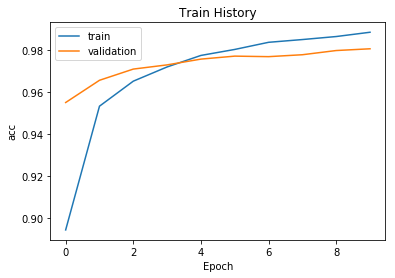

In [20]:
show_train_history(train_history,'acc','val_acc')

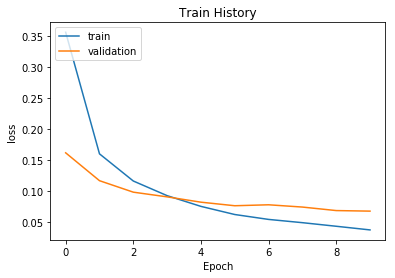

In [21]:
show_train_history(train_history,'loss','val_loss')

## 評估模型準確率

In [28]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 2s 228us/step

accuracy= 0.9806


## 進行預測

In [29]:
prediction=model.predict_classes(x_Test)

In [30]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [31]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

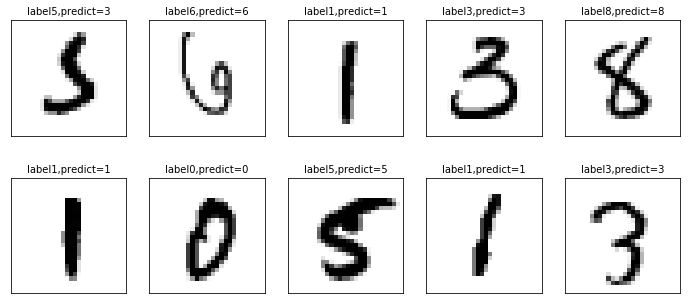

In [32]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340)

## confusion matrix

In [33]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,1,1,1,0,0,1,1,2,0
1,0,1126,3,1,0,0,2,0,3,0
2,6,1,1006,3,4,0,2,5,5,0
3,0,0,0,1000,0,1,0,3,2,4
4,1,0,4,0,968,0,1,0,2,6
5,3,0,0,10,1,867,5,0,5,1
6,6,2,0,1,7,4,935,0,3,0
7,3,6,8,2,1,0,0,1000,4,4
8,5,0,1,8,4,1,0,2,951,2


In [34]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [35]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
3902,5,3
4271,5,3
4360,5,3
5937,5,3


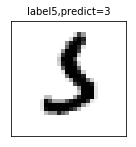

In [36]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

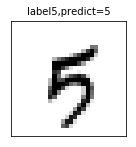

In [37]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)